<a href="https://colab.research.google.com/github/LazarVidic/PPIPO/blob/main/PPIPO_projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detekcija lica


##Principi prezentacije i prepoznavanje oblika
##Student: Lazar Vidić, IT33/2020

---------------------------------------------------------------------------------------------------------------------------------------------------------
##Postavka problema


Detekcija lica se može posmatrati kao zasebna oblast mašinskog učenja. Koristi se za detekciju ljudi, analizu emocija, procenu starosti i drugih elemenata. Najčešći slučajevi primene ovih metoda su sigurnosni detektori lica koji se najčešće koriste za otključavanje mobilnih telefona.

Detektori ključnih tačaka lica uglavnom pokušavaju da detektuju sledeće delove lica:

   - usta
   - desna obrva
   - leva obrva
   - desno oko
   - levo oko
   - vilica

Metode koje rešavaju problem detekcije lica podeljene su na dve osnovne grupe na osnovu načina rada algoritama:

Klasični pristup predstavlja kategoriju modela za prepoznavanje lica koji koriste algoritme za prepoznavanje određenih karakteristika na fotografijama. Poređenjem karakteristika na većem broju primera, formira se model koji donosi predikciju da li se na fotografiji nalazi lice i u slučaju da je rezultat pozitivan vraća nam poziciju lica na slici. Haar-cascade i HOG predstavljaju primere modela klasičnog pristupa koji će biti testirani u nastavku ovog rada.

Moderni pristup obuhvata metode dubokog učenja čija je popularnost značajno porasla u poslednjih nekoliko godina zbog velikog napretka u konvolucijskim neuronskim mrežama u 2021. godini kao i sve veće pristupačnosti dobrih grafičkih kartica. Ovi pristupi nastoje ispraviti nedostatke i nadograditi klasične modele za detekciju lica. MTCNN je primer modela koji pripada modernom pristupu koji će biti testiran u nastavku ovog rada.

##Set podataka
Dataset koji je korišćen sadrži slike glumaca iz filma Avengers: Chris Evans, Chris Hemsworth, Mark Ruffalo, Robert Downey Jr i Scarlett Johansson.

Učitavanje dataseta potrebnog za izradu zadatka:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/AVENGERS_FaceDetection.zip' /content/images.zip

In [ ]:
!du -h images.zip

55M	images.zip


In [ ]:
!unzip images.zip

Archive:  images.zip
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_evans20.png  
  inflating: cropped_images/chris_evans/chris_evans21.png  
  inflating: cropped_images/chris_evans/chris_evans22.png  
  inflating: cropped_images/chris_evans/chris_evans23.png  
  inflating: cropped_

##Detekcija lica pomoću Hog algoritma, 68 ključnih tačaka lica

HOG je tehnika koja se često koristi za identifikaciju detalja na slici, posebno za zadatke detekcije objekata.Način na koji radi HOG tehnika je sledeći:

1. Osnovna ideja Hog algoritma je podela slike na male povezane ćelije

2. Izračunavanje histograma za svaku ćeliju

3. Objedinjavanje svih histograma kako bi se kreirao vektor obeležja, odnosno formira se jedan histogram od svih malih histograma koji je jedinstven za svako lice

Jedan od nedostataka detekcije lica uz pomoć HOG algoritma je taj što ne funkcioniše dobro sa licima pod nepravnim uglom, već samo sa ravnim i frontalnim licima. Veoma je korisno ako se koristi za otkrivanje lica na skeniranim dokumentima poput vozačkih dozvola i pasoša, ali nije pogodan za video snimke u realnom vremenu.

In [ ]:
#preuzimanje fajlova neophodnih za detekciju
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2
datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2024-02-05 21:17:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  15.2MB/s    in 6.5s    

2024-02-05 21:17:21 (9.46 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



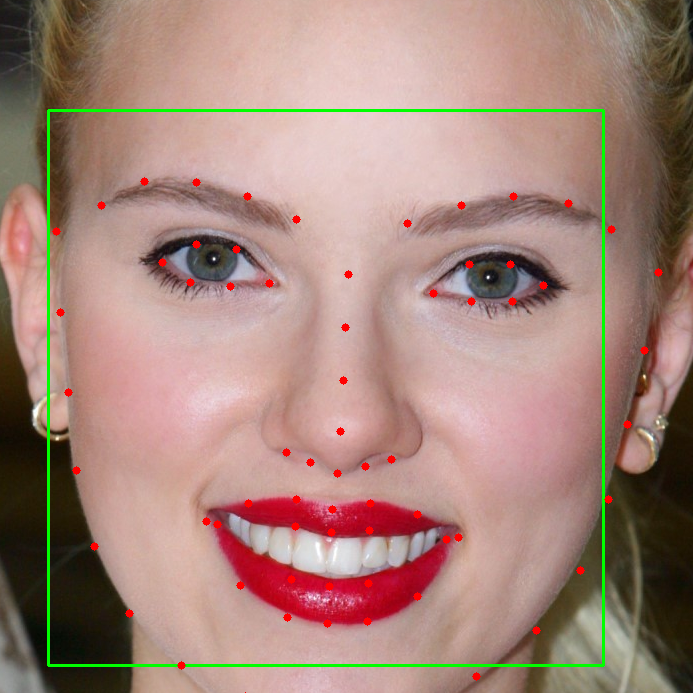

In [ ]:
#preuzimanje potrebnih biblioteka
import dlib
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from imutils import face_utils


#učitavanje pretreniranog modela za prepoznavanje karakterističnih tačaka
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

#učitavanje slike
image = cv2.imread("cropped_images/scarlett_johansson/scarlett_johansson32.png")

#konverzija u grayscale sliku
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#detekcija lica na grayscale slici
hogFaceDetector = dlib.get_frontal_face_detector()
faces = hogFaceDetector(gray, 1)
# 1 koristimo jer nije potrebno uvećanje slike i preciznija detekcija

#iteracija kroz sve detekcije
for (i, face) in enumerate(faces):
  shape = predictor(gray, face)
  shape = face_utils.shape_to_np(shape)
  #određivanje ključnih tačaka
  #shape predstavlja 68 koordinata

#iteracija kroz sva lica i crtanje pravugaonika oko njih
for (i, rect) in enumerate(faces):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    #crtanje pravugaonika
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

#crtanje 68 ključnih tačaka
for(x,y) in shape:
    cv2.circle(image, (x,y), 4, (0,0,255), -4)

#prikaz rezultata
cv2_imshow(image)


##OpenCV

OpenCV (Open Source Computer Vision Library) je otvorena biblioteka namenjena računarskom vidu i obradi slika. Razvijena je kako bi pružila alate i algoritme za širok spektar zadataka, uključujući detekciju objekata, prepoznavanje lica, praćenje pokreta i druge aspekte vizuelne percepcije. OpenCV je višejezična i podržava Python, Java i C++, čime omogućava široku primenu u različitim programerskim okruženjima. Ova efikasna biblioteka se koristi širom sveta u  industrijskim i istraživačkim projektima, pružajući korisnicima moćan alat za rad sa slikama i videom.

##Detekcija lica pomoću Haar-cascade algoritma

Algoritam se može objasniti u četiri faze:

1. Izračunavanje Haar karakteristika
2. Kreiranje integralnih slika
3. Korišćenje Adaboost-a
4. Implementacija kaskadnih klasifikatora

###1. Izračunavanje Haar karakteristika

Prvi korak je prikupljanje Haar karakteristika. Haar karakteristike su u suštinski proračuni koji se izvode na susednim pravougaonim regionima na određenoj lokaciji u prozoru za detekciju. Proračun uključuje sabiranje intenziteta piksela u svakom regionu i izračunavanje razlika između suma.

###2. Kreiranje integralnih slika

Integralne slike su u suštini ubrzanje izračunavanja ovih Haar karakteristika. Umesto da računa na svakom pikselu, umesto toga, algoritam kreira pravougaonike i stvara reference niza za svaki od tih pravougaonika. Zatim se ovi podaci koriste za izračunavanje Haar karakteristika.

###3. Korišćenje Adaboost-a

Adaboost u suštini bira najbolje karakteristike i obučava klasifikatore da ih koriste. Koristi kombinaciju "slabih klasifikatora" za kreiranje "jakog klasifikatora" koji algoritam može koristiti za otkrivanje ##4. Implementacija kaskadnih klasifikatora

Kaskadni klasifikator se sastoji od niza faza, gde je svaka faza skup slabih učenika. Slabi učenici se obučavaju korišćenjem pojačavanja, što omogućava visoko precizan klasifikator iz srednjeg predviđanja svih slabih učenika.

Na osnovu ovog predviđanja, klasifikator ili odlučuje da označi da je objekat pronađen (pozitivno) ili da pređe na sledeći region (negativno). Faze su dizajnirane da odbace negativne uzorke što je brže moguće, jer većina prozora ne sadrži ništa od interesa.

Važno je maksimizirati nisku stopu lažno negativnih, jer će klasifikovanje objekata kao neobjekta ozbiljno narušiti algoritam detekcije objekata.



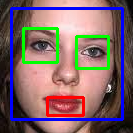

-1

In [ ]:
import numpy as np
import cv2

f_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
e_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))
s_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_smile.xml'))

#preuzimanje fotografije iz dostupnog dataseta
image = cv2.imread("cropped_images/scarlett_johansson/scarlett_johansson21.png")

#konvertovanje u grayscale verziju fotografije
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#detekcija lica na preuzetoj fotografiji
faces = f_cascade.detectMultiScale(gray,  1.1, 1)

#crtanje pravugaonika oko prepoznatog lica
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

#crtanje pravugaonika oko prepoznatih ociju
    eyes = e_cascade.detectMultiScale(roi_gray, 1.07, 9)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

#crtanje pravugaonika oko prepoznatih usta
    smile = s_cascade.detectMultiScale(roi_gray, 1.32, 6)
    for (mx,my,mw,mh) in smile:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

#prikaz rezultata
cv2_imshow(image)
cv2.waitKey(0)

###Primena Haar-cascade algoritma

Prepoznavanje lica: Slično kao što iPhone koristi prepoznavanje lica, drugi elektronski uređaji mogu koristiti Haar-cascade da utvrde validnost korisnika za sigurno prijavljivanje.

Robotika: Robotske mašine mogu "videti" svoju okolinu kako bi obavljale zadatke koristeći prepoznavanje objekata. Na primer, ovo se može koristiti za automatizaciju proizvodnih zadataka.

Autonomna vozila: Autonomna vozila zahtevaju znanje o svom okruženju, a Haar-cascade može pomoći u identifikaciji objekata, kao što su pešaci, semafori i trotoari, kako bi se donele bolje odluke prilikom vožnje i povećala bezbednost.

Pretraživanje slika i prepoznavanje objekata: Proširujući prepoznavanje lica, bilo koji različiti objekti se mogu pretraživati korišćenjem algoritama Haar-cascade.

Poljoprivreda: Haar klasifikatori se mogu koristiti da se utvrdi da li štetne bube lete na biljkama, smanjujući nestašicu hrane uzrokovanu štetočinama.

Industrijska upotreba: Haar klasifikatori se mogu koristiti da bi se omogućilo mašinama da prikupljaju i prepoznaju određene objekte, automatizujući mnoge zadatke koje su ljudi ranije morali samostalno da rade.


##MTCNN algoritma za detekciju lica

MTCNN (Multi-Task Cascaded Convolutional Networks) algoritam je tehnologija koja je napravila revoluciju u oblasti detekcije i prepoznavanja lica. Razvijen je 2016. godine, MTCNN algoritam koristi kaskadni niz neuronskih mreža za otkrivanje, poravnavanje i izdvajanje crta lica iz digitalnih slika sa velikom preciznošću i brzinom.

Instaliranje neophodnih biblioteka:

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.1 MB/s eta 0:00:00


1/1 [==============================] - 0s 20ms/step


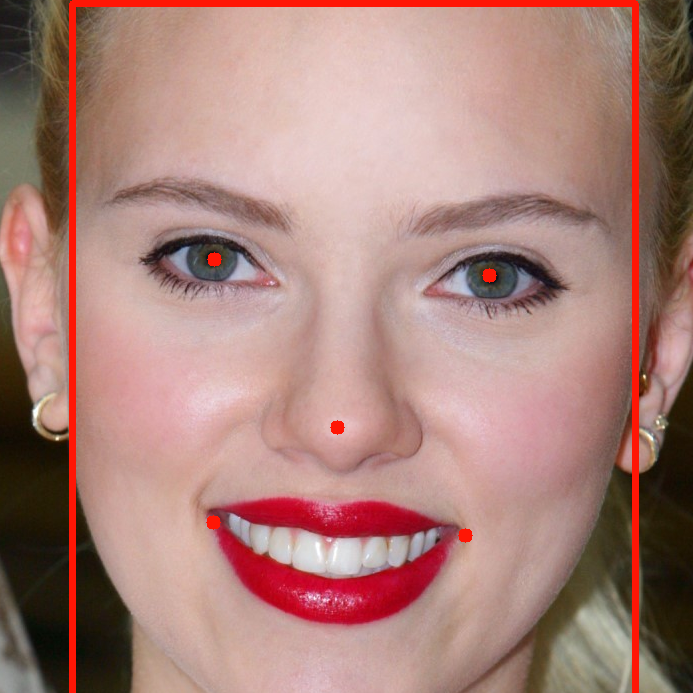

In [ ]:
from mtcnn import MTCNN
import cv2

#inicijalizovanje MTCNN detektora
detector = MTCNN()

#učitavanje ulazne slike i konvertovanje u grayscale sliku
image = cv2.imread("cropped_images/scarlett_johansson/scarlett_johansson32.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#detekcija lica pomoću MTCNN
faces = detector.detect_faces(image)

#pronalaženje lica na slici
for face in faces:
    x, y, w, h = face['box']
    extracted_face = image[y:y+h, x:x+w]
#detektovanje lica na slici
faces = detector.detect_faces(image)
bounding_box = faces[0]['box']
keypoints = faces[0]['keypoints']

#crtanje pravougaonika (cv2.rectangle(fotografija, start_point, end_point, boja, debljina))
cv2.rectangle(image, (bounding_box[0], bounding_box[1]), (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]), (5, 22, 255), 5)

#kreiranje tački koje ce oznacavati levo i desno oko, nos i levu i desnu ivicu usta
cv2.circle(image,(keypoints['left_eye']), 2, (5, 22, 255), 10)
cv2.circle(image,(keypoints['right_eye']), 2, (5, 22, 255), 10)
cv2.circle(image,(keypoints['nose']), 2, (5, 22, 255), 10)
cv2.circle(image,(keypoints['mouth_left']), 2, (5, 22, 255), 10)
cv2.circle(image,(keypoints['mouth_right']), 2, (5, 22, 255), 10)

#prikaz rezultata
cv2_imshow(image)


###Primena MTCNN algoritma
MTCNN algoritam ima brojne primene u realnom životu u različitim oblastima, uključujući bezbednost, zabavu i marketing. U domenu bezbednosti, MTCNN se koristi za sisteme video nadzora za otkrivanje i praćenje pojedinaca u realnom vremenu, kao što su osumnjičeni, nestala lica itd.MTCNN se takođe koristi u sistemima za verifikaciju identiteta, kao što je kontrola pasoša, kako bi se osiguralo da osoba odgovara fotografiji na njenoj ličnoj karti, povećavajući mere bezbednosti na aerodromima i drugim bezbednim lokacijama.

U zabavi, MTCNN se koristi za razvoj aplikacija virtuelne realnosti i proširene stvarnosti, kao što su filteri društvenih medija i avatari za igre. Ove aplikacije koriste MTCNN za otkrivanje i praćenje pokreta i izraza lica u realnom vremenu, omogućavajući korisnicima da primenjuju zabavne i kreativne filtere ili manipulišu virtuelnim avatarima na realističniji i zanimljiviji način. U marketingu, MTCNN se koristi za analizu demografije i emocija kupaca, kao što su njihov uzrast, pol i izrazi lica, da bi se prilagodile reklamne kampanje i preporuke proizvoda. Razumevanjem emocija i reakcija kupaca na različite proizvode i reklame, kompanije mogu bolje da usmere svoje marketinške napore i poboljšaju svoju prodaju. Pored toga, MTCNN se koristi u medicinskom polju za pomoć u dijagnostici i lečenju različitih bolesti, kao što su dismorfologija lica i apneja u snu, demonstrirajući svestranost i korisnost algoritma u različitim primenama.

##Prepoznavanje lica

Prepoznavanje lica je proces otkrivanja ili potvrđivanja identiteta pojedinaca na osnovu slike lica. Različite kompanije i aplikacije često koriste sistem za prepoznavanje lica da verifikuju identitet ljudi na video snimcima, fotografijama ili u stvarnom svetu.

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=79636d75157e88265ce3f43d813ff98902b2a05179ef1b13ffc0fe1fc82c555d
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
#kreiranje foldera i ubacivanje slike sa više lica
!mkdir AvengersTest
!wget https://ichef.bbci.co.uk/news/976/cpsprodpb/1453F/production/_101236238_avengers2.jpg -O AvengersTest/avengers_test1.jpg
!wget https://media.glamour.com/photos/627fec3c7f9b9aefba2510d9/master/w_2560%2Cc_limit/452760796 -O AvengersTest/avengers_test2.jpg

mkdir: cannot create directory ‘AvengersTest’: File exists
--2024-02-05 21:37:14--  https://ichef.bbci.co.uk/news/976/cpsprodpb/1453F/production/_101236238_avengers2.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.38.30.132, 2a02:26f0:c900:696::f33, 2a02:26f0:c900:69f::f33, ...
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.38.30.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123623 (121K) [image/jpeg]
Saving to: ‘AvengersTest/avengers_test1.jpg’

AvengersTest/avenge 100%[===================>] 120.73K  --.-KB/s    in 0.01s   

2024-02-05 21:37:14 (11.8 MB/s) - ‘AvengersTest/avengers_test1.jpg’ saved [123623/123623]

--2024-02-05 21:37:14--  https://media.glamour.com/photos/627fec3c7f9b9aefba2510d9/master/w_2560%2Cc_limit/452760796
Resolving media.glamour.com (media.glamour.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.glamour.com (media.glamour.com)|151.101.0.239|:443... connected.
HTTP request sent, awaitin

In [ ]:
import face_recognition
from PIL import Image, ImageDraw
from IPython.display import display

#učitavanje slike i primena face encodinga za prepoznavanje osobe
scarlet_img=face_recognition.load_image_file('cropped_images/scarlett_johansson/scarlett_johansson32.png')
scarlet_face_encoding = face_recognition.face_encodings(scarlet_img) [0]

hemsworth_img=face_recognition.load_image_file('cropped_images/chris_hemsworth/chris_hemsworth32.png')
hemsworth_face_encoding = face_recognition.face_encodings(hemsworth_img) [0]

evans_img=face_recognition.load_image_file('cropped_images/chris_evans/chris_evans29.png')
evans_face_encoding = face_recognition.face_encodings(evans_img) [0]

mark_img=face_recognition.load_image_file('cropped_images/mark_ruffalo/mark_ruffalo32.png')
mark_face_encoding = face_recognition.face_encodings(mark_img) [0]

robert_img=face_recognition.load_image_file('cropped_images/robert_downey_jr/robert_downey_jr32.png')
robert_face_encoding = face_recognition.face_encodings(robert_img) [0]

#niz poznatih osoba
known_face_encodings = [ scarlet_face_encoding, hemsworth_face_encoding, evans_face_encoding, mark_face_encoding, robert_face_encoding ]

#imena poznatih osoba
known_face_encodings_names = [ "Scarlett Johansson", "Chris Hemsworth", "Chris Evans", "Mark Ruffalo", "Robert Downey Jr" ]

<ipython-input-23-22b82222edc0>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw1.textsize(name)
<ipython-input-23-22b82222edc0>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw1.textsize(name)
<ipython-input-23-22b82222edc0>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw1.textsize(name)
<ipython-input-23-22b82222edc0>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw1.textsize(name)
<ipython-input-23-22b82222edc0>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength ins

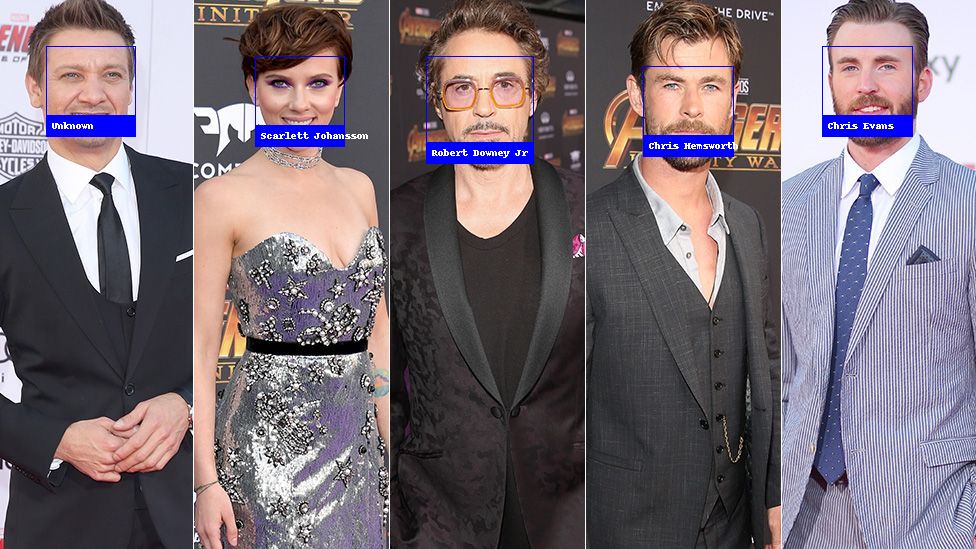

In [ ]:
#učitavanje test slika
test_image1 = face_recognition.load_image_file('AvengersTest/avengers_test1.jpg')

#pronalaženje lica
face_locations1 = face_recognition.face_locations(test_image1)
face_encodings1 = face_recognition.face_encodings(test_image1, face_locations1)

#konvertovanje u PIL format zbog dodavanja teksta i pravougaonika
pil_test_image1 = Image.fromarray(test_image1)

#omogucava crtanje po slici
draw1 = ImageDraw.Draw(pil_test_image1)

#prolazak kroz sva pronadjena lica za test sliku
for (top, right, bottom, left), face_encoding in zip(face_locations1, face_encodings1):
    #provera da li je pronadjeno lice poznato
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    #proveravamo koliko se lice sa slike razlikuje od poznatih lica
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)

    #pronalazimo indeks najmanje udaljenosti u nizu
    best_match_index = np.argmin(face_distances)

    #proveravamo da li se lice na slici podudara sa poznatim licem sa najmanjom udaljenošću
    if matches[best_match_index]:
        name = known_face_encodings_names[best_match_index]

    #crtanje pravougaonika oko pronadjenog lica
    draw1.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    #ispis imena ispod pronadjenog lica
    text_width, text_height = draw1.textsize(name)
    draw1.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw1.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


#prikaz konačnih rezultata prepoznavanja
display(pil_test_image1)

<ipython-input-24-c0fc9328b938>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw2.textsize(name)
<ipython-input-24-c0fc9328b938>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw2.textsize(name)
<ipython-input-24-c0fc9328b938>:35: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw2.textsize(name)


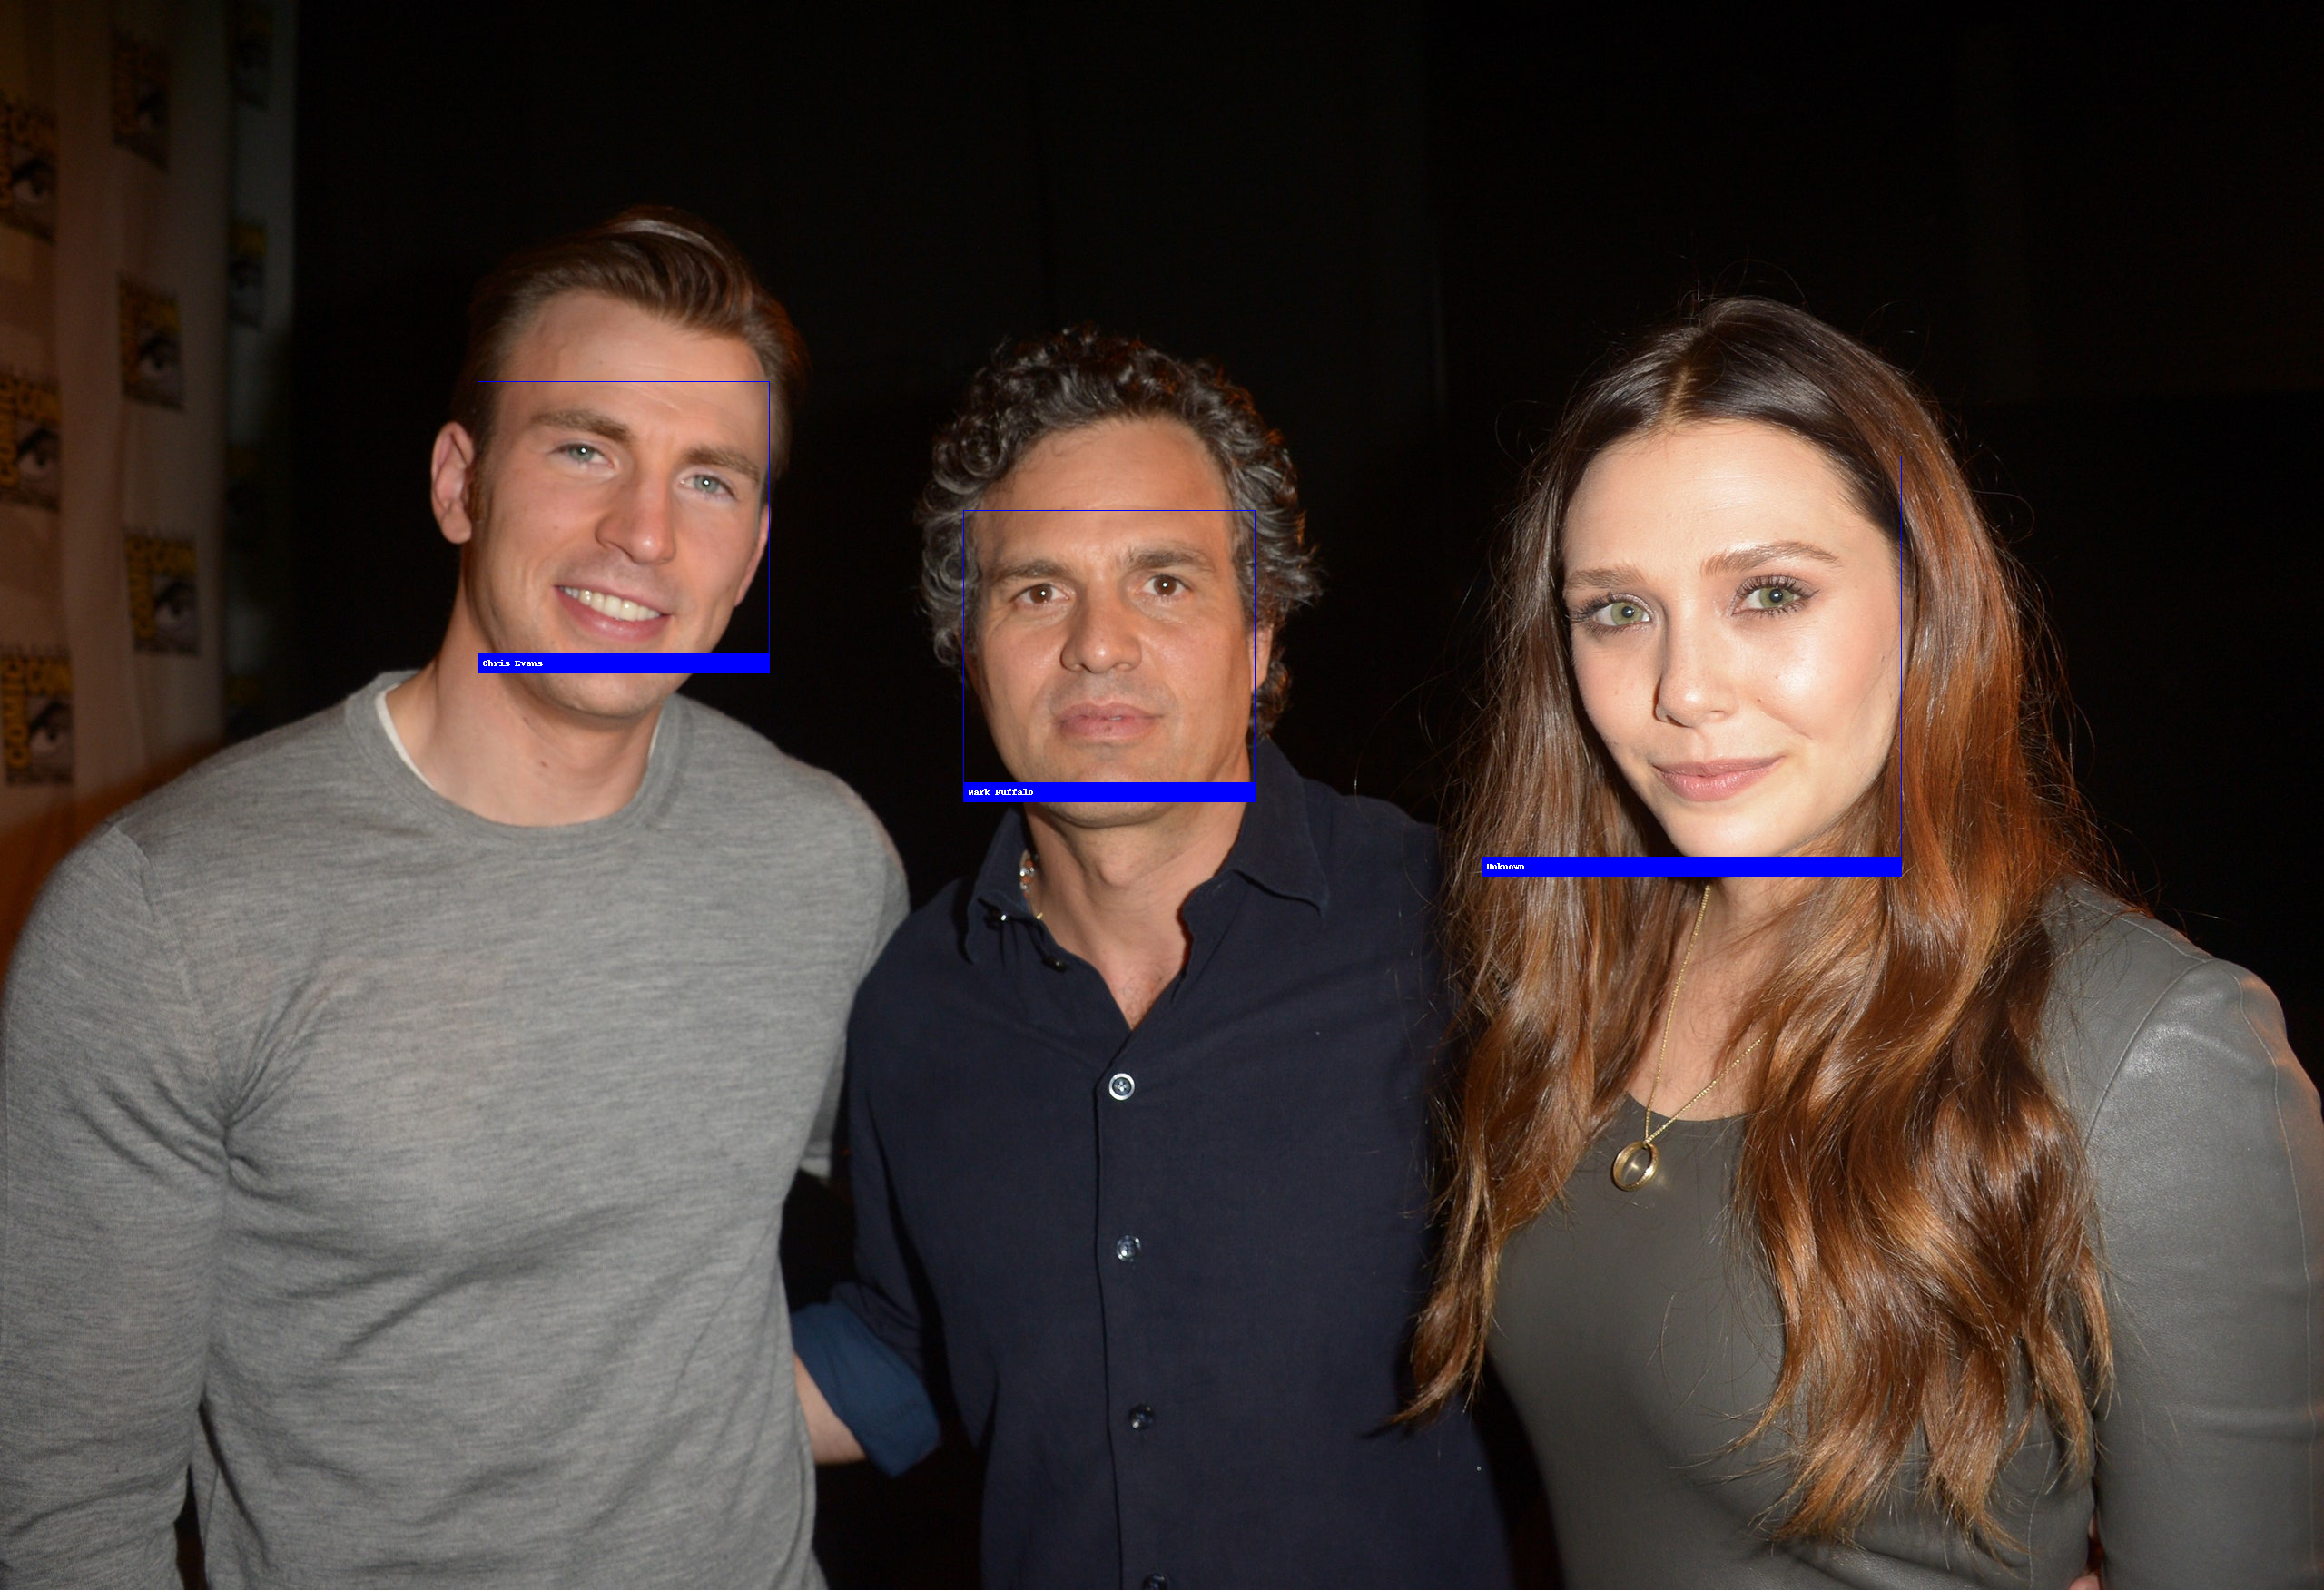

In [ ]:
#učitavanje test slika
test_image2 = face_recognition.load_image_file('AvengersTest/avengers_test2.jpg')

#pronalaženje lica
face_locations2 = face_recognition.face_locations(test_image2)
face_encodings2 = face_recognition.face_encodings(test_image2, face_locations2)

#konvertovanje u PIL format zbog dodavanja teksta i pravougaonika
pil_test_image2 = Image.fromarray(test_image2)

#omogucava crtanje po slici
draw2 = ImageDraw.Draw(pil_test_image2)

#prolazak kroz sva pronadjena lica za test sliku
for (top, right, bottom, left), face_encoding in zip(face_locations2, face_encodings2):
    #provera da li je pronadjeno lice poznato
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    #proveravamo koliko se lice sa slike razlikuje od poznatih lica
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)

    #pronalazimo indeks najmanje udaljenosti u nizu
    best_match_index = np.argmin(face_distances)

    #proveravamo da li se lice na slici podudara sa poznatim licem sa najmanjom udaljenošću
    if matches[best_match_index]:
        name = known_face_encodings_names[best_match_index]

    #crtanje pravougaonika oko pronadjenog lica
    draw2.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    #ispis imena ispod pronadjenog lica
    text_width, text_height = draw2.textsize(name)
    draw2.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw2.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


#prikaz konačnih rezultata prepoznavanja
display(pil_test_image2)

##Evaluacija


Treba istaći da su gore prikazani modeli pokrenuti na fotografijama prilagođenim za izvršavanje ovakvog zadatka. Takođe, modeli su testirani na malom broju fotografija. Sve ovo su razlozi zbog kojih je teško uočiti bitne razlike između korišćenih modela. Međutim, tokom istraživanja oblasti za ovaj rad primetio sam sledeće karakteristike:

HOG model detekcije pruža dobre rezultati pri rešavanju problema detekcije lica, ali ga je potrebno trenirati na većem broju podataka da bi postigao jednaku tačnost kao i Haar-cascade pristup. Razlog tome je što su ljudska lica različita za svaku osobu u pogledu manjih karakteristika, zbog toga i informacije oko pojedinih piksela znatno variraju od osobe do osobe.

Nedostaci Haar-cascade modela su neprilagodljivost modela i nepreciznost. Pod neprilagodljivšću se podrazumijeva to da u okviru modela postoji jasno definisan način određivanja objekata na slikama. Slike se uvek pretražuju sa unapred određenim veličinama prozora za pretraživanje te ako ne detektira objekat unutar takvog prozora, zato što nije u celosti uhvaćen ili vidljiv, neće ga prihvatiti. Nepreciznost modela dolazi iz jasno definisanih karakteristika koja se pretražuju na slici. Postoji mogućnost da se pronađe objekat na slici koji ne predstavlja lice, ali zadovoljava definisane uslove. Ovo je mana koja se jako često pojavljuje. Jedna od prednosti klasičnog pristupa nad modernim se nalazi u procesu treniranja modela. Da bi trenirali jedan Haar-cascade model potrebno nam je znatno manje podataka nego za treniranje modela dubokog učenja. Uz manji skup podataka za treniranje smanjuje se i vreme treniranja samog modela. Vreme za treniranje kod modela dubokog učenja može trajati nedeljama.

MTCNN model, predstavlja primer modernog pristupa detekcije objekata, odnosno lica. Cilj modela modernog pristupa je nadomestiti nedostatke klasičnog pristupa, pa je zbog toga najveća prednost MTCNN modela preciznost i prilagodljivost. MTCNN je još uvek među najpreciznijim modelima za detekciju objekata koji su dovoljno brzi za korišćenje u stvarnom vremenu. Moderni pristup zahteva znatno više računarske snage u odnosu na klasični, što utiče na brzinu rada modela.



##Zaključak

Detekcija lica je izuzetno dinamična oblast koja obuhvata raznolike tehnike i pristupe, kao što su klasične i moderne metode, uključujući napredne tehnologije mašinskog učenja. Ovaj projektni zadatak predstavlja samo mali deo oblasti detekcije lica pomoću klasičnih metoda, modernih metoda i mašinskog učenja.

U prvom delu projekta, korišćeni su modeli klasičnih metoda, uključujući HOG i Haar-cascade modele. HOG model analizira lokalne intenzitete ivica i njihove orijentacije, dok Haar-cascade model koristi skup Haar-ovih karakteristika za brzu detekciju objekata. Ovi pristupi su od bitnog značaja u istoriji detekcije lica, pružajući temeljne metode koje su se često koristile u ranijim fazama razvoja.

S druge strane, savremeni pristupi donose napredne tehnologije. MTCNN model, kao predstavnik modernog pristupa, koristi kaskadu konvolucijskih neuralnih mreža kako bi simultano detektovao objekat na slici. Ovakve neuralne mreže pokazuju visoku tačnost i sposobnost rešavanja složenih scenarija, što ih čini ključnim u savremenom kontekstu detekcije lica.

U projektu je prikazan proces identifikacije osoba sa fotografije kroz upotrebu specifičnih metoda i alata kao i biblioteka namenjenih za detekciju lica.

Ova oblast, sa svojim obimnim skupom podataka, algoritama i metoda, doprinosi stvaranju naprednih sistema bezbednosti. Detekcija lica ne samo da olakšava svakodnevni život, već i doprinosi stvaranju sigurnijih okruženja, kako u privatnom tako i u javnom sektoru. Stalni razvoj tehnologija u ovoj oblasti obećava dalje unapređenje performansi detekcije lica, čime se ostvaruje napredak u bezbednosti i sigurnosti društva.


##Literatura


###1. HOG algoritam: https://medium.com/mlcrunch/face-detection-using-dlib-hog-198414837945
###2. Algoritmi za detekciju lica: https://medium.com/codex/facial-landmark-detection-algorithms-5b2d2a12adaf
###3. OpenCV za detekciju lica: https://www.datacamp.com/tutorial/face-detection-python-opencv
###4. Haar-cascade: https://medium.com/analytics-vidhya/haar-cascades-explained-38210e57970d
###5. OpenCV: https://medium.com/analytics-vidhya/introduction-to-computer-vision-opencv-in-python-fb722e805e8b
###6. Detekcija lica: https://datagen.tech/guides/face-recognition/face-recognition-with-python/
###7. MTCNN algoritam: https://medium.com/the-modern-scientist/multi-task-cascaded-convolutional-neural-network-mtcnn-a31d88f501c8